## Logistische Regression

Das Seoul Bike Data Set enthält Daten von Fahrradverleihen in Seoul (Südkorea). Hier werden bei jedem Verleih einige zusätzliche Daten gespeichert.

Bei diesem Datenset geht es darum, Lineare Regression anzuwenden, um Zukunftswerte vorherzusagen.

    Date : year-month-day
    Rented Bike count - Count of bikes rented at each hour
    Hour - Hour of he day
    Temperature-Temperature in Celsius
    Humidity - %
    Windspeed - m/s
    Visibility - 10m
    Dew point temperature - Celsius
    Solar radiation - MJ/m2
    Rainfall - mm
    Snowfall - cm
    Seasons - Winter, Spring, Summer, Autumn
    Holiday - Holiday/No holiday
    Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [211]:
data = pd.read_csv("Data/SeoulBikeData.csv", date_format="%d/%m/%Y")

In [212]:
data = data[data["Functioning Day"] == "Yes"]

In [213]:
data.drop(columns=["Seasons", "Holiday", "Functioning Day"], inplace=True)

In [214]:
data.rename(columns={
    "Rented Bike Count": "RentedBikes",
    "Temperature(°C)": "Temp",
    "Humidity(%)": "Humidity",
    "Wind speed (m/s)": "WindSpeed",
    "Visibility (10m)": "Visibility",
    "Dew point temperature(°C)": "DewTemp",
    "Solar Radiation (MJ/m2)": "SolarRad",
    "Rainfall(mm)": "Rainfall",
    "Snowfall (cm)": "Snowfall"
}, inplace=True)

In [215]:
data

,Date,RentedBikes,Hour,Temp,Humidity,WindSpeed,Visibility,DewTemp,SolarRad,Rainfall,Snowfall
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         8465 non-null   object 
 1   RentedBikes  8465 non-null   int64  
 2   Hour         8465 non-null   int64  
 3   Temp         8465 non-null   float64
 4   Humidity     8465 non-null   int64  
 5   WindSpeed    8465 non-null   float64
 6   Visibility   8465 non-null   int64  
 7   DewTemp      8465 non-null   float64
 8   SolarRad     8465 non-null   float64
 9   Rainfall     8465 non-null   float64
 10  Snowfall     8465 non-null   float64
dtypes: float64(6), int64(4), object(1)
memory usage: 793.6+ KB


In [217]:
data["Date"] = pd.to_datetime(data["Date"], format="%d/%m/%Y").dt.dayofyear

In [218]:
data.rename(columns={"Date":"DayOfYear"})

,DayOfYear,RentedBikes,Hour,Temp,Humidity,WindSpeed,Visibility,DewTemp,SolarRad,Rainfall,Snowfall
0,335,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,335,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,335,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,335,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,335,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8755,334,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,334,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,334,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,334,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


#### Aufteilen

Das Datenset muss hier in Trainingsdaten und Testdaten geteilt werden

Und zusätzlich muss die linke Seite des DS (die Daten) und die rechte Seite (die Klasse) getrennt werden

In [219]:
r = data["RentedBikes"]

In [220]:
data.drop(columns=["RentedBikes"], inplace=True)

In [221]:
data["RentedBikes"] = r

In [223]:
random = data.sample(frac=1)
p80 = int(len(random) * 0.8)

training = random[0:p80]
test = random[p80:]

training_left = training.iloc[:, 0:-1]
training_right = training.iloc[:, -1]

test_left = test.iloc[:, 0:-1]
test_right = test.iloc[:, -1]

test_right.index = np.arange(len(test_right))

#### Skalieren

Outlier entfernen; Zahlen im Datenset "normalisieren"

In [224]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
training_left = pd.DataFrame(scaler.fit_transform(training_left))

scaler = StandardScaler()
test_left = pd.DataFrame(scaler.fit_transform(test_left))

In [225]:
training_left

,0,1,2,3,4,5,6,7,8,9
0,0.201384,-0.941453,1.013308,0.971907,-1.387751,0.059492,1.272122,-0.656497,-0.134826,-0.176422
1,0.919495,-1.230586,0.436052,0.146079,0.069220,0.925603,0.484840,-0.656497,-0.134826,-0.176422
2,-1.574998,1.227042,-0.759692,-0.145390,-0.707831,-0.556335,-0.639849,-0.656497,-0.134826,-0.176422
3,0.654928,-0.507754,0.642215,0.971907,0.749139,-0.309346,0.949711,-0.286937,-0.134826,-0.176422
4,-1.093107,0.359644,-0.289641,-1.505577,1.137665,0.728011,-0.947264,2.022813,-0.134826,-0.176422
...,...,...,...,...,...,...,...,...,...,...
6767,-1.537203,-0.507754,-0.957608,1.360532,-0.513569,-2.043214,-0.354928,-0.656497,-0.134826,-0.176422
6768,-0.308854,-0.796887,0.287615,-2.817187,-1.193488,0.247204,0.409860,-0.598753,-0.134826,-0.176422
6769,0.362014,1.660741,1.384401,0.971907,-0.319306,0.051259,1.602030,-0.656497,-0.134826,-0.176422
6770,1.703749,-0.074055,-1.609083,-1.456999,0.360614,0.902551,-1.959484,0.359793,-0.134826,-0.176422


### Lineare Regression aus SkLearn

In [226]:
from sklearn.linear_model import LinearRegression

In [227]:
lr = LinearRegression()

In [228]:
lr_model = lr.fit(training_left, training_right)

In [229]:
p = lr_model.predict(test_left)

In [230]:
p

array([1130.89294068, 1407.2763505 , 1546.21336392, ...,  903.8370602 ,
       1128.37566561,  196.3879034 ], shape=(1693,))

In [231]:
prediction = model.predict(test_left)
left_real = pd.DataFrame(test_left)
left_real["Prediction"] = prediction
left_real["Actual"] = test_right
pct = left_real["Prediction"] / left_real["Actual"]
left_real["%"] = pct
left_real.loc[left_real["%"] > 1, "%"] = np.power(pct[pct > 1], -1)
left_real["%"] *= 100

left_real.sort_values("%")

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


,0,1,2,3,4,5,6,7,8,9,Prediction,Actual,%
50,-1.141914,-1.368169,-0.916443,1.906111,-0.678716,-1.361272,-0.225041,-0.644584,-0.123379,-0.17034,0.000000,180,0.000000
1381,-0.349308,-1.223940,0.157695,1.856259,0.461231,-1.270292,0.763805,-0.644584,0.400658,-0.17034,0.000000,43,0.000000
1374,-1.390200,-1.223940,-1.449348,1.058633,2.456138,-1.741439,-0.910225,-0.644584,-0.018572,0.03773,0.000000,60,0.000000
1370,-1.533442,-0.935483,-1.199549,-0.586471,-0.298734,-0.189903,-1.213886,-0.644584,-0.123379,-0.17034,0.000000,61,0.000000
1346,-0.635792,0.506802,-0.291944,1.856259,0.461231,-1.734941,0.343351,-0.291238,1.448732,-0.17034,0.000000,14,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,-0.101022,0.074116,1.281792,-0.686174,0.461231,-1.249172,0.849453,2.683709,-0.123379,-0.17034,986.214966,988,99.819329
366,-0.874529,1.372173,0.116062,0.360710,-0.013747,-1.203682,0.288848,-0.644584,-0.123379,-0.17034,1047.614014,1046,99.845934
1397,-0.062825,-0.214341,1.106933,-1.234542,-0.773712,0.607798,0.366710,2.284770,-0.123379,-0.17034,900.917969,902,99.880041
198,0.147264,-0.214341,1.231832,0.460414,0.366235,0.117155,1.316624,0.825792,-0.123379,-0.17034,909.085449,910,99.899500


In [232]:
left_real["%"].mean()

np.float64(70.79443544843137)

### Neurales Netzwerk

In [233]:
from tensorflow.keras.layers import Dense, Input

In [234]:
model = tf.keras.Sequential([
    Input((10,)),  # Input: Beschreibt die Form der Daten (14 Spalten, X Zeilen)
    Dense(32, activation="relu"),
    Dense(32, activation="relu"),
    Dense(1, activation="relu")
])

In [235]:
model.compile(loss="mean_squared_error")

In [236]:
history = model.fit(training_left, training_right, verbose=1, epochs=100)

Epoch 1/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 1s 957us/step - loss: 919262.0625
Epoch 2/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 787411.9375
Epoch 3/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 498635.2188
Epoch 4/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 251182.5312
Epoch 5/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 200613.3906
Epoch 6/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 189998.2969
Epoch 7/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 185204.6250
Epoch 8/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 182456.3125  
Epoch 9/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 180587.2812
Epoch 10/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 179333.4219
Epoch 11/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 178293.0156
Epoch 12/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 177664.8281  
Epoch 13/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 177088.6250
Epoch 14/100
212/212 ━━━━

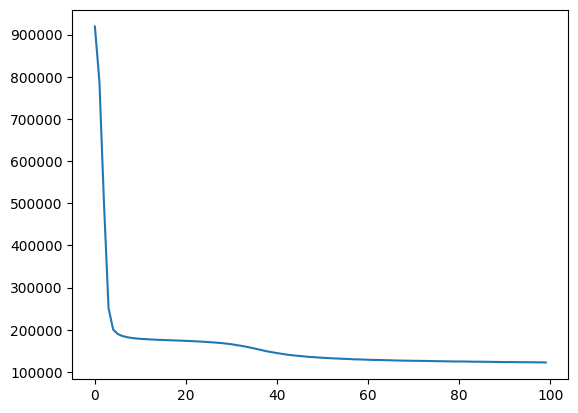

In [237]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])

In [238]:
model.predict(test_left)

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[1434.6592 ],
       [ 979.53815],
       [ 983.91656],
       ...,
       [ 970.45416],
       [1278.438  ],
       [ 238.7686 ]], shape=(1693, 1), dtype=float32)

In [239]:
prediction = model.predict(test_left)
left_real = pd.DataFrame(test_left)
left_real["Prediction"] = prediction
left_real["Actual"] = test_right
pct = left_real["Prediction"] / left_real["Actual"]
left_real["%"] = pct
left_real.loc[left_real["%"] > 1, "%"] = np.power(pct[pct > 1], -1)
left_real["%"] *= 100

left_real.sort_values("%")

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step


,0,1,2,3,4,5,6,7,8,9,Prediction,Actual,%
1153,-1.103716,-1.079712,-0.658317,1.557149,0.841213,-0.670798,-0.069317,-0.644584,-0.123379,-0.17034,174.859985,4,2.287545
1512,1.703826,-0.070112,-0.699950,1.806408,-0.868707,-2.050122,-0.045958,-0.587593,-0.123379,-0.17034,330.929474,9,2.719613
10,1.264551,1.083716,-0.017165,1.906111,-0.773712,-1.905528,0.615867,-0.644584,-0.123379,-0.17034,687.730286,19,2.762711
9,-0.673990,-0.502798,-0.283617,-0.985284,-0.868707,-0.674047,-0.629922,0.255879,-0.123379,-0.17034,483.614807,20,4.135523
1563,-1.113265,1.227944,-0.142064,1.058633,-0.488725,0.909982,0.273275,-0.644584,-0.123379,-0.17034,605.490906,26,4.294036
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,-1.705332,0.218345,-0.883136,-1.832762,0.556226,0.817377,-1.681057,0.609225,-0.123379,-0.17034,247.807785,248,99.922494
1572,0.481495,0.795259,1.406692,-0.985284,1.126200,0.945724,0.779377,0.335666,-0.123379,-0.17034,1807.029907,1806,99.943006
951,1.255001,0.074116,0.016142,0.909078,-0.393729,-1.346650,0.374496,-0.074671,-0.123379,-0.17034,697.332703,697,99.952289
1386,-0.139220,0.651030,0.998686,-0.137806,-0.963703,0.495697,0.872812,0.802995,-0.123379,-0.17034,1550.705688,1550,99.954492


In [240]:
left_real["%"].mean()

np.float64(68.69856466108126)